<a href="https://colab.research.google.com/github/guscabmelo/ML-PROJECTS/blob/main/DESMPENHO_MODELO_DE_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Esse código faz parte do estudo de Machine Learning. Nele será calculado o desempenho e as métricas do modelo**

In [1]:
# IMPORTANDO AS BIBLIOTECAS DO PROJETO
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


NESSE EXEMPLO IREI UTILIZAR DADOS FICTICIOS E AS CLASSES PARA SER UTILIZADAS NO ESTUDO DA AVALIAÇÃO DO MODELO

In [2]:
# Gerando um conjunto de dados fictício
np.random.seed(42)
data_size = 500

# Features fictícias
features = pd.DataFrame({
    'feature1': np.random.rand(data_size),
    'feature2': np.random.rand(data_size),
    'feature3': np.random.rand(data_size),
    'feature4': np.random.rand(data_size)
})

# Classes fictícias (5 tipos de plantas)
labels = np.random.choice(['Planta_A', 'Planta_B', 'Planta_C', 'Planta_D', 'Planta_E'], size=data_size)


AGORA IREMOS DIVIDIR OS DADOS EM CONJUTOS, TREINAR O MODELO E FAZER PREVISÕES.

In [3]:

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Treinando o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

NO PRÓXIMO PASSO VAMOS GERAR E CRIAR O PLOT DA MATRIZ DE CONFUSÃO, BEM COMO O RELATÓRIO DA CLASSIFICAÇÃO DO MODELO TREINADO

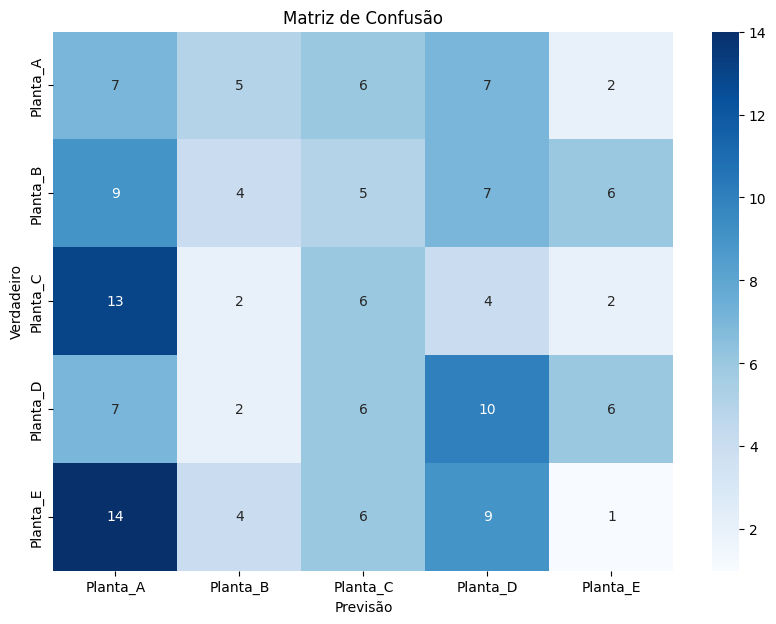

              precision    recall  f1-score   support

    Planta_A       0.14      0.26      0.18        27
    Planta_B       0.24      0.13      0.17        31
    Planta_C       0.21      0.22      0.21        27
    Planta_D       0.27      0.32      0.29        31
    Planta_E       0.06      0.03      0.04        34

    accuracy                           0.19       150
   macro avg       0.18      0.19      0.18       150
weighted avg       0.18      0.19      0.18       150



In [4]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(labels))

# Exibindo a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))


POR ÚLTIMO DEFINIREMOS A FUNÇÃO QUE CALCULARÁ AS MÉTRICAS DE AVALIAÇÃO DO MODELO.
TP | FP | FN | TN

In [5]:
# Calculando métricas
def calculate_metrics(conf_matrix):
    metrics = {}
    for i, label in enumerate(np.unique(labels)):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

        metrics[label] = {
            'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Precision': precision,
            'Accuracy': accuracy,
            'F1 Score': f1_score
        }
    return metrics

metrics = calculate_metrics(conf_matrix)
for label, metric in metrics.items():
    print(f"Class: {label}")
    print(f"TP: {metric['TP']}, FP: {metric['FP']}, FN: {metric['FN']}, TN: {metric['TN']}")
    print(f"Sensitivity: {metric['Sensitivity']:.4f}")
    print(f"Specificity: {metric['Specificity']:.4f}")
    print(f"Precision: {metric['Precision']:.4f}")
    print(f"Accuracy: {metric['Accuracy']:.4f}")
    print(f"F1 Score: {metric['F1 Score']:.4f}\n")

Class: Planta_A
TP: 7, FP: 43, FN: 20, TN: 80
Sensitivity: 0.2593
Specificity: 0.6504
Precision: 0.1400
Accuracy: 0.5800
F1 Score: 0.1818

Class: Planta_B
TP: 4, FP: 13, FN: 27, TN: 106
Sensitivity: 0.1290
Specificity: 0.8908
Precision: 0.2353
Accuracy: 0.7333
F1 Score: 0.1667

Class: Planta_C
TP: 6, FP: 23, FN: 21, TN: 100
Sensitivity: 0.2222
Specificity: 0.8130
Precision: 0.2069
Accuracy: 0.7067
F1 Score: 0.2143

Class: Planta_D
TP: 10, FP: 27, FN: 21, TN: 92
Sensitivity: 0.3226
Specificity: 0.7731
Precision: 0.2703
Accuracy: 0.6800
F1 Score: 0.2941

Class: Planta_E
TP: 1, FP: 16, FN: 33, TN: 100
Sensitivity: 0.0294
Specificity: 0.8621
Precision: 0.0588
Accuracy: 0.6733
F1 Score: 0.0392

